In [1]:
#Download the Dataset from Analytics Vidya

!wget https://datahack-prod.s3.amazonaws.com/train_file/Train_aBjfeNk.csv
!wget https://datahack-prod.s3.amazonaws.com/test_file/Test_LqhgPWU.csv
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_wyi0h0z.csv

--2020-08-01 17:50:01--  https://datahack-prod.s3.amazonaws.com/train_file/Train_aBjfeNk.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.40
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 425369 (415K) [text/csv]
Saving to: ‘Train_aBjfeNk.csv’

Train_aBjfeNk.csv   100%[===================>] 415.40K   425KB/s    in 1.0s    

2020-08-01 17:50:03 (425 KB/s) - ‘Train_aBjfeNk.csv’ saved [425369/425369]

--2020-08-01 17:50:05--  https://datahack-prod.s3.amazonaws.com/test_file/Test_LqhgPWU.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.96
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133098 (130K) [text/csv]
Saving to: ‘Test_LqhgPWU.csv’

Test_LqhgPWU.csv    100%[===========

In [2]:
#Importing required Dependencies

import pandas as pd
from fastai import *
from fastai.tabular import *

In [36]:
#Opening CSV Files

train = pd.read_csv('/content/Train_aBjfeNk.csv')
test = pd.read_csv("/content/Test_LqhgPWU.csv")

# Declaring dependent, Categorical and Continuous Variables
dep_var = 'Segmentation'
cat_names = ['ID','Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
cont_names = ['Age', 'Work_Experience', 'Family_Size']
procs = [FillMissing, Categorify, Normalize]

In [37]:
# Test Tabular List
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

# Train Data Bunch
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_idx(list(range(0,1200)))
                        .label_from_df(cols = dep_var)
                        .add_test(test, label=0)
                        .databunch())

data

TabularDataBunch;

Train: LabelList (6868 items)
x: TabularList
ID 462509; Gender Female; Ever_Married Yes; Graduated Yes; Profession Artist; Spending_Score Average; Var_1 Cat_6; Work_Experience_na False; Family_Size_na False; Age 0.1458; Work_Experience -0.7547; Family_Size -0.5334; ,ID 459469; Gender Male; Ever_Married Yes; Graduated Yes; Profession Healthcare; Spending_Score Low; Var_1 Cat_6; Work_Experience_na True; Family_Size_na False; Age -0.8088; Work_Experience -0.4491; Family_Size 2.1001; ,ID 465499; Gender Male; Ever_Married No; Graduated Yes; Profession Artist; Spending_Score Low; Var_1 Cat_6; Work_Experience_na False; Family_Size_na False; Age 1.1600; Work_Experience -0.7547; Family_Size -1.1917; ,ID 464913; Gender Male; Ever_Married Yes; Graduated Yes; Profession Entertainment; Spending_Score Low; Var_1 Cat_4; Work_Experience_na False; Family_Size_na False; Age 0.5037; Work_Experience -0.7547; Family_Size 0.7834; ,ID 465969; Gender Female; Ever_Married No; Graduated Yes; 

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


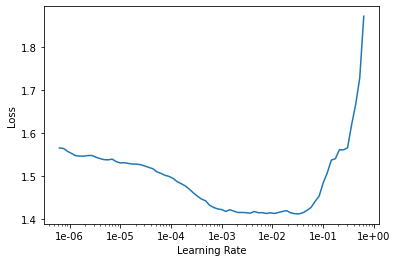

In [43]:
# Create deep learning model
learn = tabular_learner(data, layers=[100,150,500], metrics=[accuracy], emb_drop=0.05, callback_fns=ShowGraph)

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.223139,1.161619,0.470833,00:01
1,0.685996,1.648024,0.390000,00:01
2,0.253227,1.669326,0.480000,00:01
3,0.208923,1.718260,0.477500,00:01
4,0.203881,1.593869,0.494167,00:01
5,0.187351,1.617942,0.509167,00:01
6,0.173033,1.597141,0.502500,00:01
7,0.187457,1.826372,0.503333,00:01
8,0.165722,1.856995,0.513333,00:01
9,0.142970,1.597352,0.494167,00:01


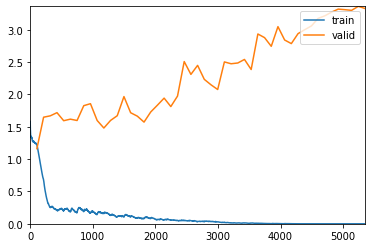

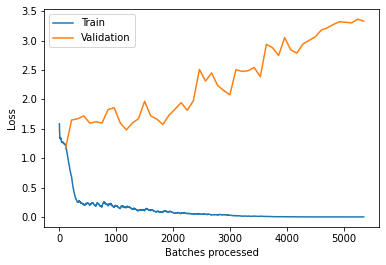

In [44]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(50, max_lr=slice(1e-02))

# Analyse our model
learn.model
learn.recorder.plot_losses()

In [45]:
pd.read_csv('/content/Train_aBjfeNk.csv').head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [46]:
# Predict our target value
predictions, *_ = learn.get_preds(DatasetType.Test)

In [47]:
seg_index = np.argmax(predictions, axis=1);seg_index

tensor([1, 2, 0,  ..., 0, 1, 3])

In [48]:
learn.data.classes

['A', 'B', 'C', 'D']

In [49]:
data = []
for i in seg_index:
  data.append(learn.data.classes[i])
data  

['B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'A',
 'B',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'D',
 'C',
 'B',
 'D',
 'B',
 'A',
 'A',
 'D',
 'D',
 'C',
 'A',
 'A',
 'D',
 'C',
 'A',
 'B',
 'C',
 'B',
 'C',
 'C',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'C',
 'A',
 'D',
 'C',
 'D',
 'B',
 'C',
 'A',
 'A',
 'C',
 'C',
 'A',
 'A',
 'A',
 'B',
 'C',
 'D',
 'C',
 'D',
 'C',
 'A',
 'D',
 'A',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'A',
 'A',
 'A',
 'A',
 'C',
 'C',
 'C',
 'A',
 'B',
 'B',
 'A',
 'A',
 'C',
 'B',
 'D',
 'C',
 'D',
 'A',
 'C',
 'D',
 'A',
 'A',
 'C',
 'C',
 'D',
 'C',
 'C',
 'B',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'A',
 'C',
 'B',
 'C',
 'B',
 'C',
 'C',
 'A',
 'C',
 'A',
 'A',
 'A',
 'B',
 'A',
 'D',
 'C',
 'D',
 'C',
 'C',
 'B',
 'D',
 'A',
 'B',
 'C',
 'C',
 'C',
 'A',
 'A',
 'B',
 'B',
 'B',
 'C',
 'A',
 'D',
 'B',
 'A',
 'A',
 'A',
 'D',
 'B',
 'D',
 'A',
 'B',
 'C',
 'C',
 'B',
 'B',
 'C',
 'D',
 'D',
 'A',
 'C',
 'B',
 'C',
 'C',
 'A',
 'D',
 'A',
 'A'

In [50]:

test = pd.read_csv('/content/Test_LqhgPWU.csv')
test_copy = test.copy()

submission = pd.DataFrame(columns=['ID','Segmentation'])
# Write submission file to score
submission['ID'] = test_copy['ID']
submission['Segmentation'] = data
submission.to_csv('v2_Theiva.csv', header=True, index=False)

# V2

In [ ]:
#Download the Dataset from Analytics Vidya
!wget https://datahack-prod.s3.amazonaws.com/train_file/Train_aBjfeNk.csv
!wget https://datahack-prod.s3.amazonaws.com/test_file/Test_LqhgPWU.csv
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_wyi0h0z.csv

In [54]:
#Importing required Dependencies
import pandas as pd
from fastai import *
from fastai.tabular import *

train = pd.read_csv('/content/Train_aBjfeNk.csv')
train.head()

test = pd.read_csv("/content/Test_LqhgPWU.csv")
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [66]:
#Preparing CSV files

train = pd.read_csv('/content/Train_aBjfeNk.csv')
test = pd.read_csv("/content/Test_LqhgPWU.csv")

# Declaring dependent, Categorical and Continuous Variables
dep_var = 'Segmentation'
cat_names = ['ID','Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
cont_names = ['Age', 'Work_Experience', 'Family_Size']
procs = [FillMissing, Categorify, Normalize]

# Test Tabular List
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

# Train Data Bunch
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_idx(list(range(0,1000)))
                        .label_from_df(cols = dep_var)
                        .add_test(test, label=0)
                        .databunch())

data
#data.show_batch(rows=10)

TabularDataBunch;

Train: LabelList (7068 items)
x: TabularList
ID 464377; Gender Female; Ever_Married No; Graduated Yes; Profession Entertainment; Spending_Score Low; Var_1 Cat_6; Work_Experience_na False; Family_Size_na False; Age 0.4432; Work_Experience -0.7564; Family_Size -1.1948; ,ID 465870; Gender Male; Ever_Married No; Graduated Yes; Profession Artist; Spending_Score Low; Var_1 Cat_6; Work_Experience_na False; Family_Size_na False; Age -0.2132; Work_Experience 0.7734; Family_Size -0.5350; ,ID 460677; Gender Female; Ever_Married #na#; Graduated No; Profession Healthcare; Spending_Score Average; Var_1 Cat_3; Work_Experience_na False; Family_Size_na False; Age 0.3239; Work_Experience -0.1445; Family_Size -0.5350; ,ID 460095; Gender Female; Ever_Married Yes; Graduated Yes; Profession Lawyer; Spending_Score Low; Var_1 Cat_6; Work_Experience_na False; Family_Size_na False; Age 1.8157; Work_Experience -0.4505; Family_Size -1.1948; ,ID 463297; Gender Male; Ever_Married No; Graduated Ye

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


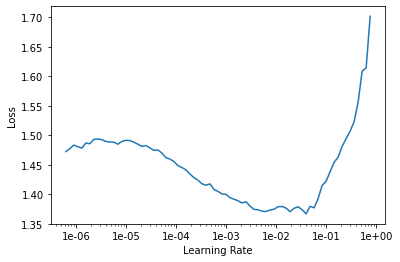

In [74]:
# Create deep learning model
learn = tabular_learner(data, layers=[100, 500, 300], metrics=accuracy, emb_drop=0.3, callback_fns=ShowGraph)

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.248506,1.213812,0.431000,00:01
1,1.170371,1.164418,0.462000,00:01
2,0.719473,1.522154,0.424000,00:01
3,0.254103,1.510517,0.492000,00:01
4,0.170311,1.672405,0.478000,00:01
5,0.141936,1.632966,0.492000,00:01
6,0.097309,1.711726,0.499000,00:01
7,0.064095,1.669415,0.506000,00:01
8,0.042772,1.878231,0.499000,00:01
9,0.032408,2.025147,0.506000,00:01


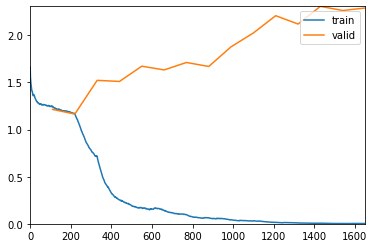

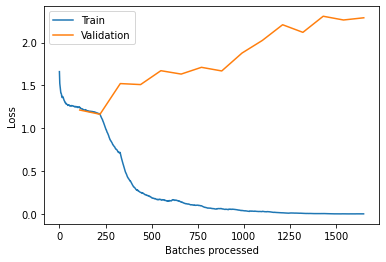

In [75]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(15, max_lr=slice(1e-03))

# Analyse our model
learn.model
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


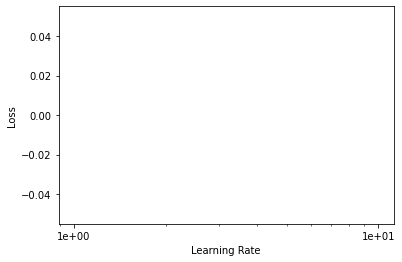

In [76]:
# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.002245,2.322629,0.497000,00:01
1,0.002294,2.219321,0.501000,00:01
2,0.002586,2.282130,0.505000,00:01
3,0.001752,2.217390,0.504000,00:01
4,0.002713,2.343294,0.500000,00:01
5,0.003471,2.307171,0.500000,00:01
6,0.002361,2.245176,0.504000,00:01
7,0.003313,2.261893,0.499000,00:01
8,0.002624,2.208497,0.505000,00:01
9,0.003581,2.233824,0.506000,00:01


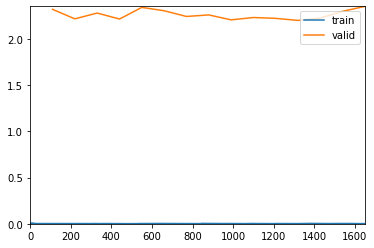

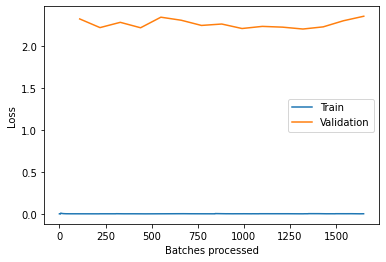

In [77]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(15, max_lr=slice(1e-06))

# Analyse our model
learn.model
learn.recorder.plot_losses()

In [78]:
# Predict our target value
categories=learn.data.classes
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)
a=[]
for i in labels: a.append(categories[i])
test = pd.read_csv('/content/Test_LqhgPWU.csv')
test_copy = test.copy()

submission = pd.DataFrame(columns=['ID','Segmentation'])

# Write submission file to score
submission['ID'] = test_copy['ID']
submission['Segmentation'] = a
submission.to_csv('v3_Theiva_new_try.csv', header=True, index=False)